In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [12]:
# Load merged dataset 
df_merge = pd.read_csv("../data/merged_f1_data.csv")
print(df_merge.head())

   resultId  raceId  driverId  constructorId  number  grid finishPosition  \
0     22130     900         3            131       6     3              1   
1     22131     900       825              1      20     4              2   
2     22132     900        18              1      22    10              3   
3     22133     900         4              6      14     5              4   
4     22134     900       822              3      77    15              5   

  positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
0            1              1    25.0  ...          206.436        1   
1            2              2    18.0  ...          205.131        1   
2            3              3    15.0  ...           205.46        1   
3            4              4    12.0  ...          204.867        1   
4            5              5    10.0  ...          206.128        1   

   forename    surname       driverName gridPosition year_x  \
0      Nico    Rosberg     Nico Rosberg  

In [7]:
# Remove rows where grid or finish positions are missing
df_plot = df_merge.dropna(subset=['gridPosition', 'finishPosition'])


In [22]:
df_plot.columns
# Keep the correct columns and rename
df_plot = df_merge.copy()  # if not already assigned

df_plot['year'] = df_plot['year_y']  # rename the correct year column
df_plot['Grand Prix'] = df_plot['Grand Prix.1']  

# Drop duplicate / unnecessary columns
df_plot = df_plot.drop(columns=['year_x','year_y','Grand Prix.1'])
print(df_plot.columns)
df_plot.to_csv("../data/merged_f1_data_clean.csv", index=False)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'finishPosition', 'positionText', 'positionOrder', 'points', 'laps',
       'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'forename', 'surname', 'driverName',
       'gridPosition', 'Grand Prix', 'year'],
      dtype='object')


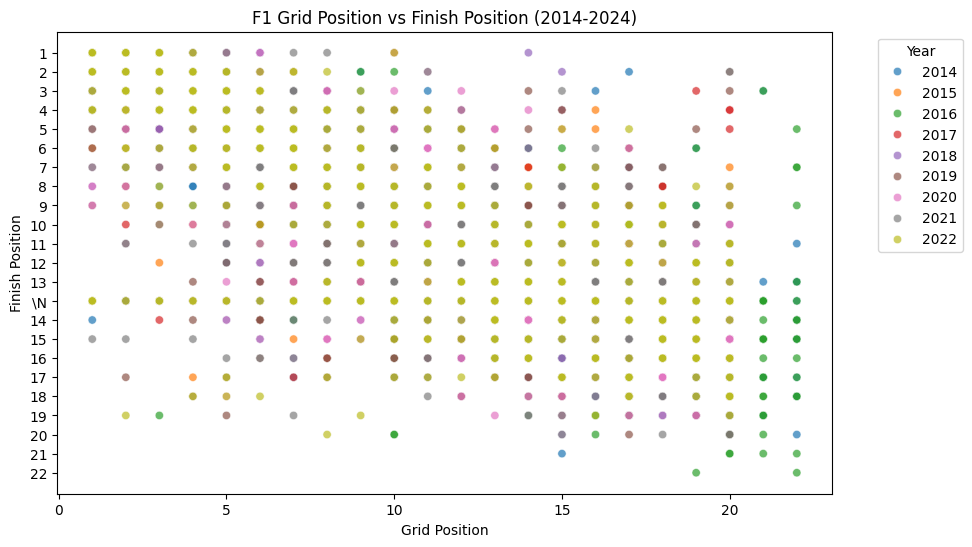

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot, 
    x='gridPosition', 
    y='finishPosition', 
    hue='year', 
    palette='tab10', 
    alpha=0.7
)
plt.xlabel("Grid Position")
plt.ylabel("Finish Position")
plt.title("F1 Grid Position vs Finish Position (2014-2024)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
# Ensure numeric types
df_plot_clean['gridPosition'] = pd.to_numeric(df_plot_clean['gridPosition'], errors='coerce')
df_plot_clean['finishPosition'] = pd.to_numeric(df_plot_clean['finishPosition'], errors='coerce')

# Drop any rows that could not be converted (NaNs)
df_plot_clean = df_plot_clean.dropna(subset=['gridPosition','finishPosition'])


/tmp/ipykernel_323520/787650366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_clean['gridPosition'] = pd.to_numeric(df_plot_clean['gridPosition'], errors='coerce')
/tmp/ipykernel_323520/787650366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_clean['finishPosition'] = pd.to_numeric(df_plot_clean['finishPosition'], errors='coerce')


In [19]:
# Pearson correlation
corr, _ = pearsonr(df_plot_clean['gridPosition'], df_plot_clean['finishPosition'])
print(f"Pearson correlation between grid and finish: {corr:.2f}")

Pearson correlation between grid and finish: 0.77


In [25]:
# Linear regression
X = sm.add_constant(df_plot_clean['gridPosition'])
y = df_plot_clean['finishPosition']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         finishPosition   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4419.
Date:                Sun, 16 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:39:24   Log-Likelihood:                -8003.9
No. Observations:                3078   AIC:                         1.601e+04
Df Residuals:                    3076   BIC:                         1.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2589      0.118     19.074   

1. Pearson correlation = 0.77
Strong positive correlation between grid position and finish position.
Drivers starting closer to P1 generally finish higher, but it’s not perfect, upsets happen.
2. Linear Regression
Model: finishPosition ≈ 2.26 + 0.658 * gridPosition
Intercept (const) ≈ 2.26 → A driver starting from P0 (hypothetically) would finish ~2nd place.
Slope (gridPosition) ≈ 0.658 → Each grid place lower roughly adds 0.66 positions in finishing order.
R-squared ≈ 0.59
~59% of the variance in finish position is explained by starting grid position alone.
There’s still ~41% variance from other factors: pit stops, weather, driver skill, reliability, strategy.
✅ What this tells us
Grid position is a strong predictor, but not the full story.

Percentage of wins by grid position (P1-P10):
gridPosition
1.0     52.486188
2.0     23.204420
3.0     12.707182
4.0      3.867403
5.0      2.762431
6.0      2.209945
7.0      0.552486
8.0      0.552486
10.0     1.657459
Name: count, dtype: float64


/tmp/ipykernel_323520/2201386117.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_percent.index, y=win_percent.values, palette='magma')


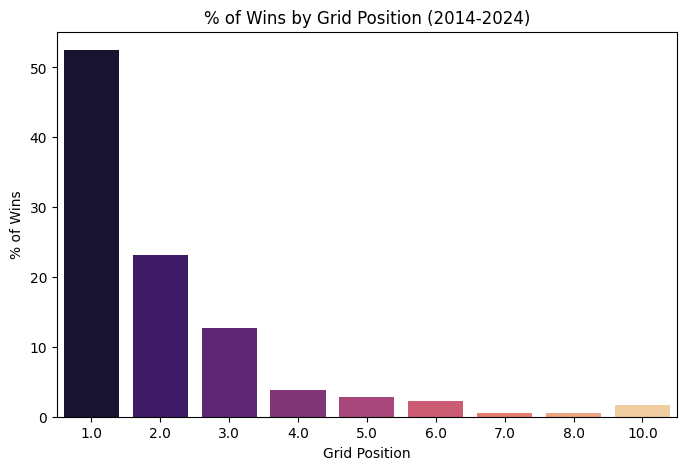

In [28]:
# Convert to numeric
df_plot['finishPosition'] = pd.to_numeric(df_plot['finishPosition'], errors='coerce')
df_plot['gridPosition'] = pd.to_numeric(df_plot['gridPosition'], errors='coerce')
df = df_plot.copy()
wins = df[df['finishPosition'] == 1]

# Count wins by grid position
win_counts = wins['gridPosition'].value_counts().sort_index()

# Keep only P1–P10
win_counts = win_counts[win_counts.index <= 10]

# Convert to percentages
win_percent = win_counts / win_counts.sum() * 100

# Display results
print("Percentage of wins by grid position (P1-P10):")
print(win_percent)

# Optional: visualize
plt.figure(figsize=(8,5))
sns.barplot(x=win_percent.index, y=win_percent.values, palette='magma')
plt.xlabel("Grid Position")
plt.ylabel("% of Wins")
plt.title("% of Wins by Grid Position (2014-2024)")
plt.show()

P1 (pole position): ~52.5% of wins
P2: ~23.2%
P3: ~12.7%
The probability drops sharply after P3.
Very few wins come from positions 7–10.
This quantifies the advantage of pole position and matches the strong correlation